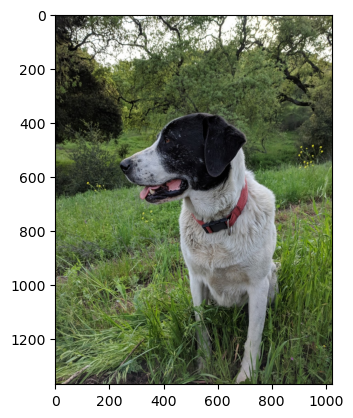

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
full=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\sammy.jpg",)
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)

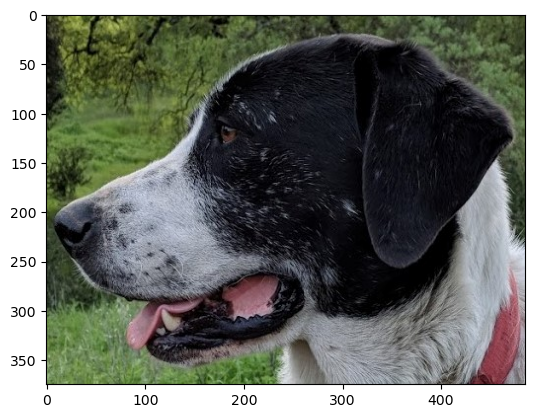

In [5]:
face=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\sammy_face.jpg",)
face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)  #böyle bir görüntüyü alıp diğer tam resimde piksel piksel tarayıp hedef göstermek bulmak

In [6]:
sum([1,2,3])

6

In [7]:
s="sum"
s([1,2,3])

TypeError: 'str' object is not callable

In [8]:
eval(s) #burada sum dedi 

<function sum(iterable, /, start=0)>

In [10]:
funcksum=eval(s)

In [11]:
funcksum([1,2,3])

6

In [12]:
height, width,channels = face.shape

In [21]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

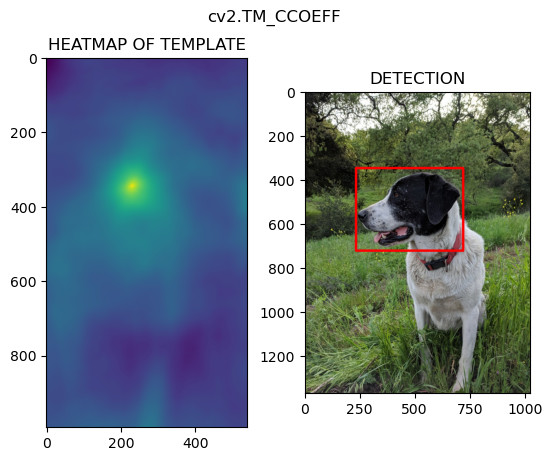

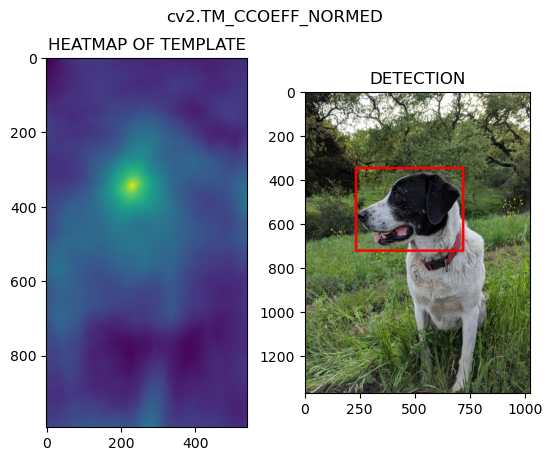

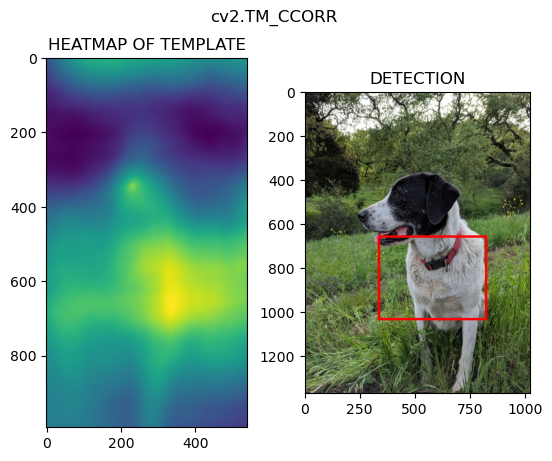

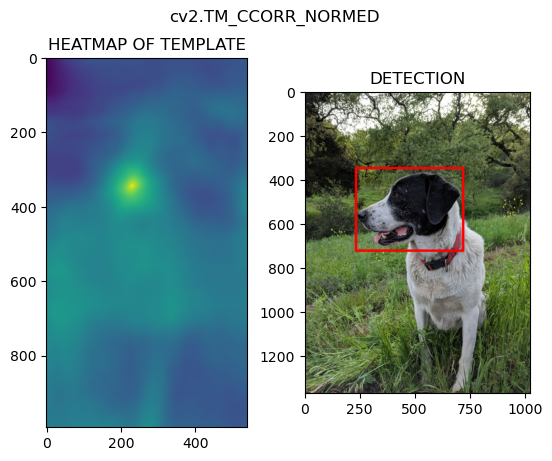

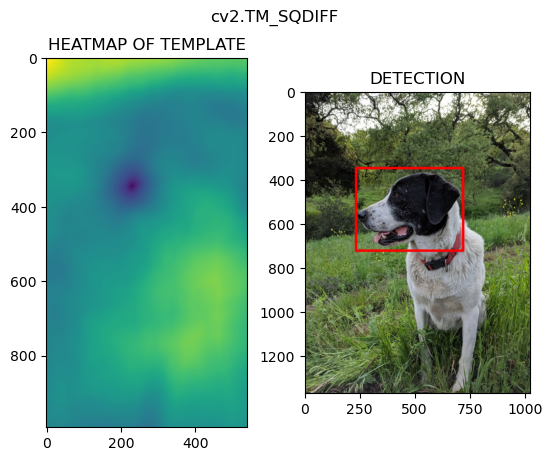

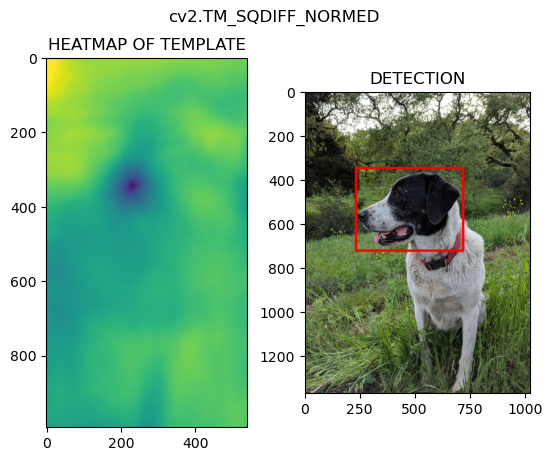

In [22]:
for i in methods:
    fullcopy=full.copy()
    
    method=eval(i)
    
    res=cv2.matchTemplate(fullcopy,face,method)
    
    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res) #min max değer ve lokasyon bulur 
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]: #bu 2 işleme geldiğinde bunlar için ayrı işlem yapcaz bu karesel yöntem
#ve sonuç ne olursa olsun kare alındığından dolayı pozitif çıkar bu yüzden dikdörtgende sol üst köşe min kısmıydı yine öyle kalır
        top_left=min_loc #bu iki methodun en iyi değeri minimum değerleridir 
    else:
        top_left=max_loc
        
#şimdi sağ alt kısmı 
    height, width,channels = face.shape
    
    buttom_right=(top_left[0]+width,top_left[1] + height) 
    cv2.rectangle(fullcopy,top_left,buttom_right,(255,0,0),10)
    
    plt.subplot(121)#1 e 2 lik görselden 1.sini tut
    plt.imshow(res)
    plt.title("HEATMAP OF TEMPLATE")
    
    plt.subplot(122)#2.sini tut 
    plt.imshow(fullcopy)
    plt.title("DETECTION")
    plt.suptitle(i)
    
    plt.show()

In [ ]:
if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
Bu kontrol ifadesi, şablon eşleme için kullanılan yöntemi belirler.

TM_SQDIFF ve TM_SQDIFF_NORMED: Bu yöntemlerde sonuçlar minimuma yaklaştıkça daha iyi eşleşme anlamına gelir.
Yani, en iyi eşleşme minimum değerde bulunur. Bu yüzden min_loc (minimum değerin bulunduğu yer) kullanılır.

Diğer yöntemler: Maksimum sonuçlar daha iyi eşleşme anlamına gelir, bu yüzden max_loc (maksimum değerin bulunduğu yer)kullanılır
    Bu kısımda, dikdörtgenin sağ alt köşe koordinatları hesaplanır. top_left zaten sol üst köşeyi belirtir. Dikdörtgenin sağ alt köşesini bulmak için şunlar yapılır:

top_left[0] + width: Sol üst köşenin x koordinatına, şablonun genişliği eklenir. Bu, sağ alt köşenin x koordinatını verir.
top_left[1] + height: Sol üst köşenin y koordinatına, şablonun yüksekliği eklenir. Bu, sağ alt köşenin y koordinatını verir.
Örnek:
Varsayalım ki şablonun boyutları şu şekilde olsun:

width (genişlik): 50 piksel
height (yükseklik): 30 piksel
Ve sol üst köşe koordinatları şu olsun:

top_left (sol üst): (100, 150)
Bu durumda, sağ alt köşe şu şekilde hesaplanır:

bottom_right (sağ alt):
X koordinatı: 100 + 50 = 150
Y koordinatı: 150 + 30 = 180
Sonuç olarak, bottom_right koordinatları (150, 180) olacaktır..

In [15]:
mymet=eval('cv2.TM_CCOEFF')
res=cv2.matchTemplate(full,face,mymet)

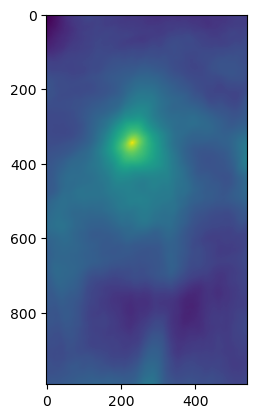

In [16]:
plt.imshow(res) #aslında ısı haritası gibi bişi en yüksek korelasyınu buludğunu düşündüğü yerlere daha yüksek değer olmasıdır 
#bu yöntem karesel farklar yöntemine bağlıdır 